In [ ]:
# shows metrics for the parasites

In [2]:
%env CUDA_VISIBLE_DEVICES=1
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append("../..")
from utils import  load_data, train_test_auc, get_path

env: CUDA_VISIBLE_DEVICES=1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# sometimes dataset specific training is better than joint and sometimes 2D is slightly better than 3D.

In [4]:
root_path = get_path()
fig_path = os.path.join(root_path, "figures")

# Evaluation of cellpose predictions on parasites

In [5]:
target_dir = os.path.join(root_path, "subset")

In [6]:
cmap = matplotlib.cm.get_cmap("tab10")
thresholds = np.arange(11)/ 10
stitch_threshold = 0.1
n_folds = 10
anisotropy = 3.2

# 2D training

## mask-r

Best method: cellpose_data_mask-r_mask-ts_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499
Best AUC: 0.42558080808080806


<AxesSubplot:>

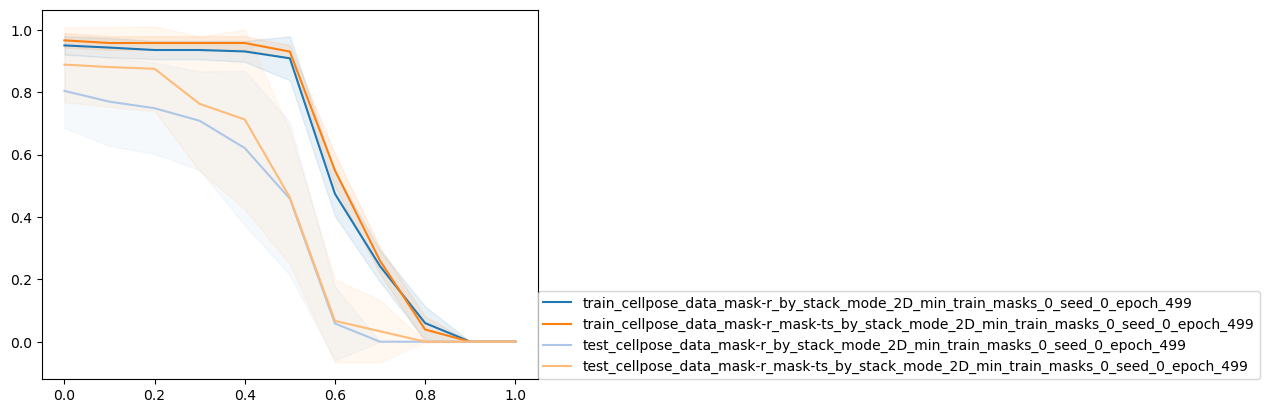

In [25]:
dataset = "mask-r"
cv_model_names =["cellpose_data_mask-r_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499",
                 "cellpose_data_mask-r_mask-ts_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499"
                 ]
train_test_auc(cv_model_names, target_dir, dataset,  thresholds=thresholds,
               n_folds=n_folds, stitch_threshold=stitch_threshold, anisotropy=anisotropy)

## mask-ts

Best method: cellpose_data_mask-ts_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499
Best AUC: 0.518939393939394


<AxesSubplot:>

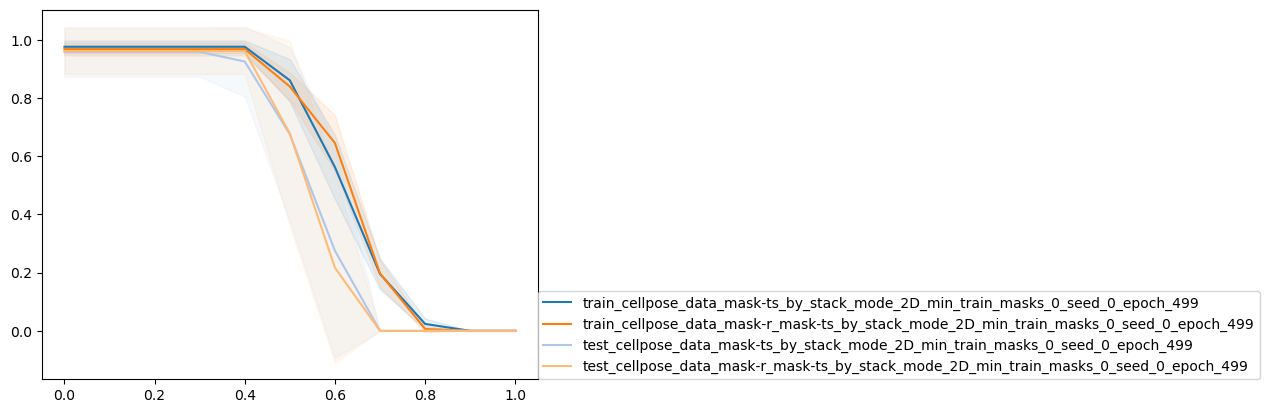

In [24]:
dataset = "mask-ts"
cv_model_names =["cellpose_data_mask-ts_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499",
                 "cellpose_data_mask-r_mask-ts_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499"
                 ]
train_test_auc(cv_model_names, target_dir, dataset,  thresholds=thresholds,
               n_folds=n_folds, stitch_threshold=stitch_threshold, anisotropy=anisotropy)



Best method: cellpose_data_mask-r_mask-ts_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499
Best AUC: 0.47021464646464645


<AxesSubplot:>

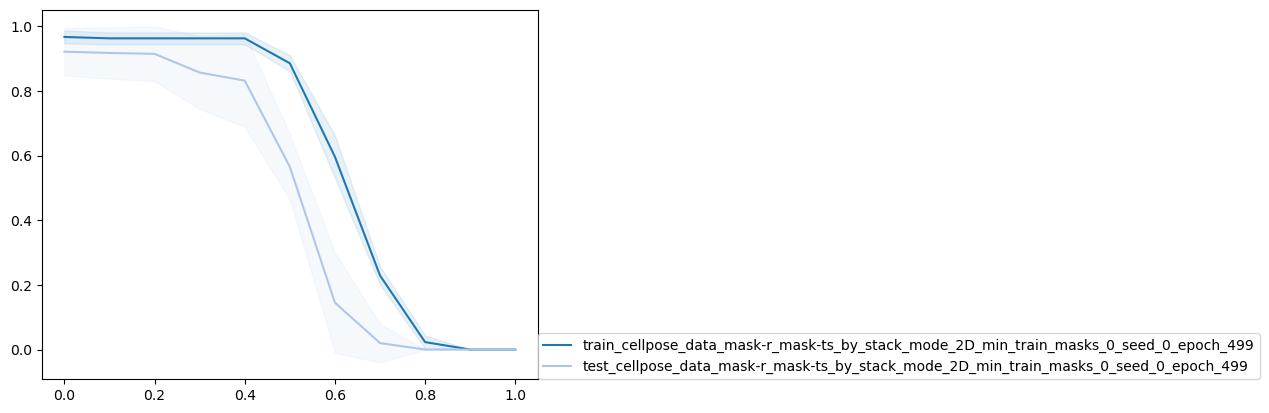

In [26]:
# joint datasets
dataset = ["mask-r", "mask-ts"]

cv_model_names =["cellpose_data_mask-r_mask-ts_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499"
                 ]
train_test_auc(cv_model_names, target_dir, dataset,  thresholds=thresholds,
               n_folds=n_folds, stitch_threshold=stitch_threshold, anisotropy=anisotropy)

# 3D training

## mask-r

Best method: cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499
Best AUC: 0.41919191919191917


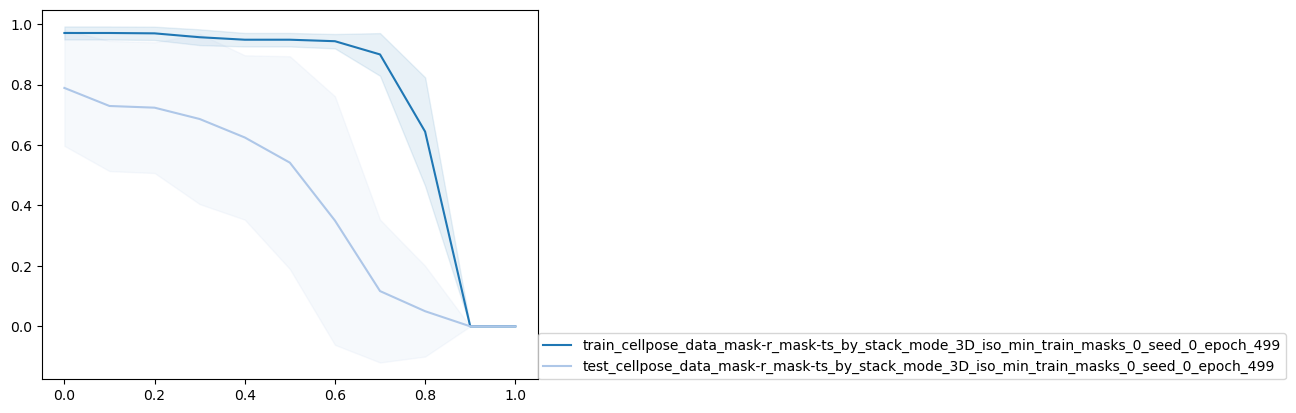

In [11]:
dataset = "mask-r"
cv_model_names =[#"cellpose_data_mask-r_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499",
                 "cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499"
                 ]
ax, aps_train, aps_test = train_test_auc(cv_model_names,
                                         target_dir,
                                         dataset,
                                         thresholds=thresholds,
                                         n_folds=n_folds,
                                         stitch_threshold=stitch_threshold,
                                         anisotropy=anisotropy,
                                         return_metrics=True)

file_name = "metric_para_data_mask-r_model_joint_before_pp"

plt.savefig(os.path.join(fig_path,
                         f"{file_name}.pdf"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200)

np.save(os.path.join(fig_path, f"{file_name}_split_fold_threshold.npy"),
        np.array(np.concatenate([aps_train, aps_test])))

## mask-ts

Best method: cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499
Best AUC: 0.6058080808080807


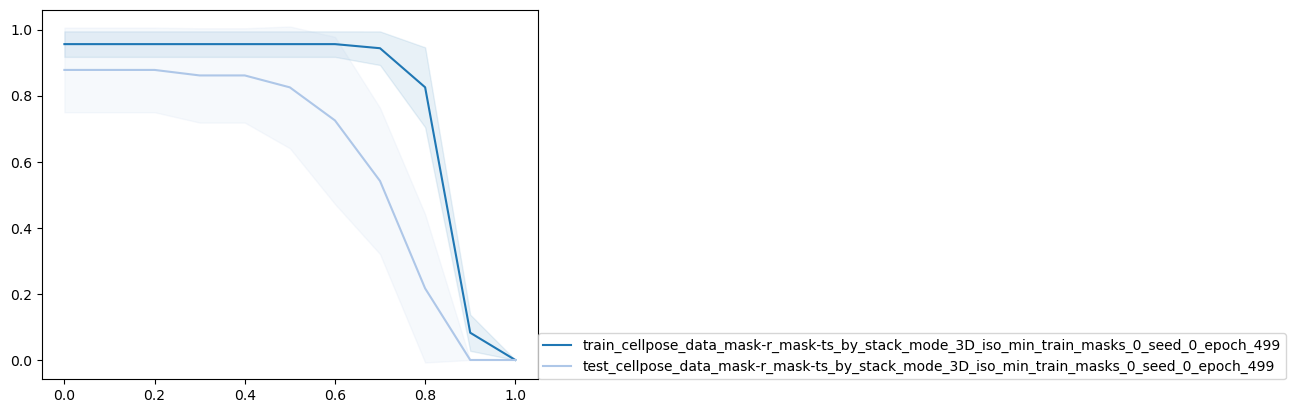

In [14]:
dataset = "mask-ts"
# remove "fold_i_of_j_" from name here
cv_model_names =[#"cellpose_data_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499",
                 "cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499"
                 ]
ax, aps_train, aps_test = train_test_auc(cv_model_names,
                                         target_dir,
                                         dataset,
                                         thresholds=thresholds,
                                         n_folds=n_folds,
                                         stitch_threshold=stitch_threshold,
                                         anisotropy=anisotropy,
                                         return_metrics=True)

file_name = "metric_para_data_mask-ts_model_joint_before_pp"

plt.savefig(os.path.join(fig_path,
                         f"{file_name}.pdf"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200)

np.save(os.path.join(fig_path, f"{file_name}_split_fold_threshold.npy"),
        np.array(np.concatenate([aps_train, aps_test])))


Best method: cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499
Best AUC: 0.5097222222222221


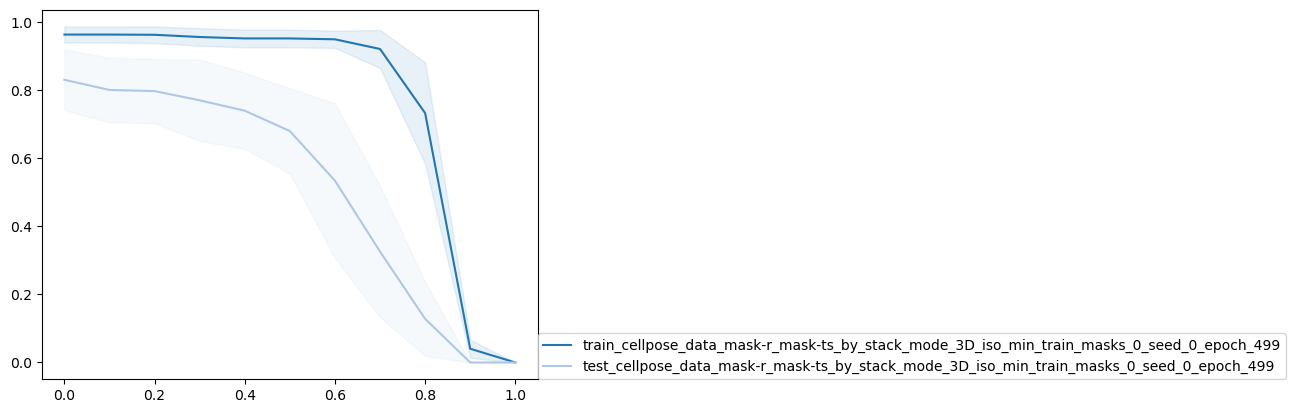

In [15]:
# joint datasets
dataset = ["mask-r", "mask-ts"]

cv_model_names =["cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499"
                 ]
ax, aps_train, aps_test = train_test_auc(cv_model_names,
                                         target_dir,
                                         dataset,
                                         thresholds=thresholds,
                                         n_folds=n_folds,
                                         stitch_threshold=stitch_threshold,
                                         anisotropy=anisotropy,
                                         return_metrics=True)

file_name = "metric_para_data_mask-r_mask-ts_model_joint_before_pp"

plt.savefig(os.path.join(fig_path,
                         f"{file_name}.pdf"),
            bbox_inches='tight',
            pad_inches=0,
            dpi=200)

np.save(os.path.join(fig_path, f"{file_name}_split_fold_threshold.npy"),
        np.array(np.concatenate([aps_train, aps_test])))

# 2D vs 3D

Best method: cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499
Best AUC: 0.5097222222222221


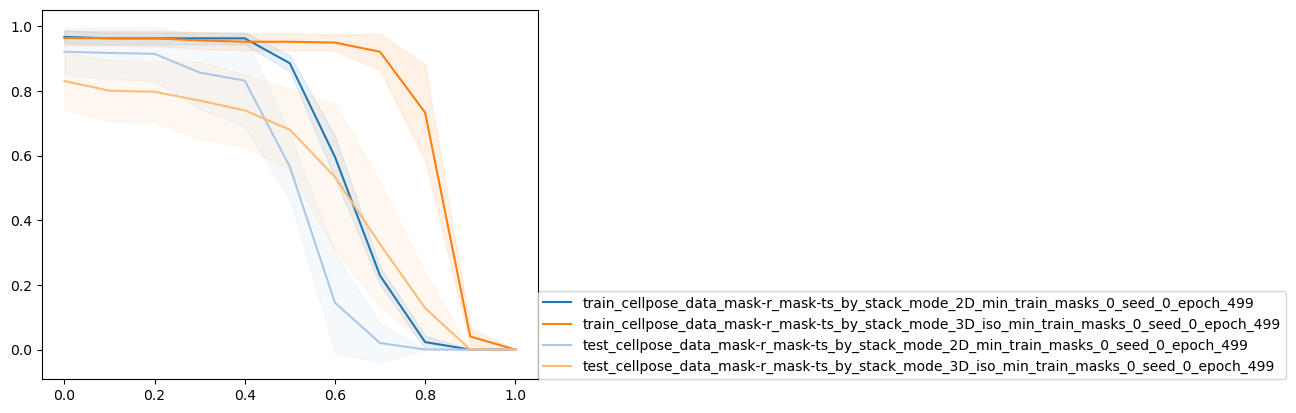

In [23]:
dataset = ["mask-r", "mask-ts"]
cv_model_names =["cellpose_data_mask-r_mask-ts_by_stack_mode_2D_min_train_masks_0_seed_0_epoch_499",
                 "cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499"
                 ]


ax = train_test_auc(cv_model_names, target_dir, dataset,  thresholds=thresholds,
               n_folds=n_folds, stitch_threshold=stitch_threshold, anisotropy=anisotropy)


# CV vs full model

Best method: cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499
Best AUC: 0.5097222222222221


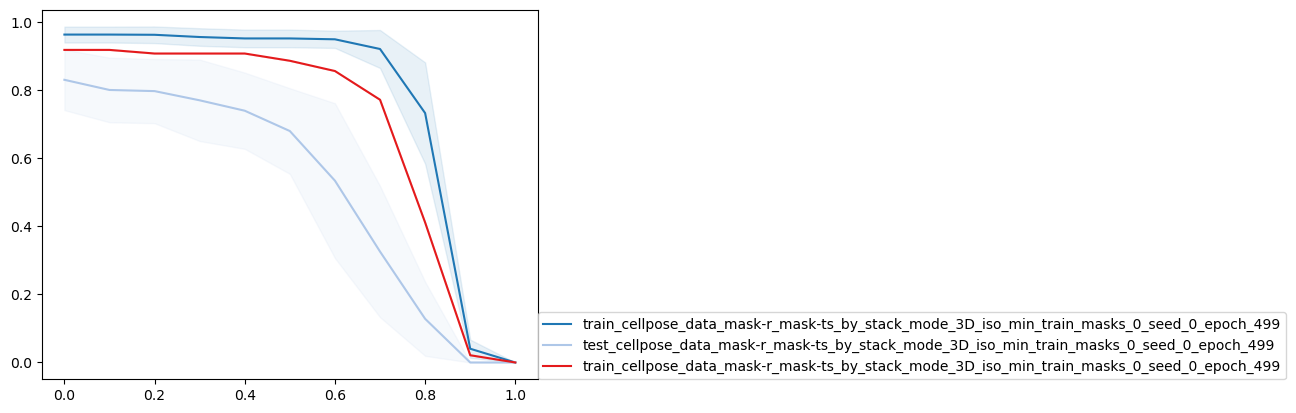

In [14]:
dataset = ["mask-r", "mask-ts"]
cv_model_names =["cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499"
                 ]

full_model_names = ["cellpose_data_mask-r_mask-ts_by_stack_mode_3D_iso_min_train_masks_0_seed_0_epoch_499"]

ax = train_test_auc(cv_model_names, target_dir, dataset,  thresholds=thresholds,
               n_folds=n_folds, stitch_threshold=stitch_threshold, anisotropy=anisotropy)

ax = train_test_auc(full_model_names, target_dir, dataset,  thresholds=thresholds,
               n_folds=1, stitch_threshold=stitch_threshold, anisotropy=anisotropy, ax=ax, cmap_name="Set1")